# Attitudes + interactions with demographics
This notebook is to see whether demogrphics might have an impact on attitudes.

In [56]:
import pandas as pd
import numpy as np
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert
import starbars 

import os
import sys
import yaml
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from scripts import utils

plot_likert.__internal__.BAR_LABEL_FORMAT = "%.1f" # plotting shows % with 2 decimals

# ignore plotting warnings to save space
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Vars
courses_cg = ["COMP202", "COMP250"]
courses_ee = ["COMP251", "COMP424", "COMP551"]
courses = courses_cg + courses_ee

deg_type = ["Undergraduate", "Graduate"]
years = ["U0", "U1", "U2", "U3", "U4+", "M1", "M2", "M3+", "PhD1", "PhD2", "PhD3", "PhD4", "PhD5+"]
majors = ["CS/SWE major", "CS/SWE minor", "Other"]
genders = ["Man", "Woman", "Other", "Prefer not to answer"]
minorities = ["Yes", "No", "Prefer not to answer"]
age = ["<18", "18-24", "25-34", "35-44", ">45", "Prefer not to answer"]
ethics_knowledge = ["Yes", "No"]
likert = range(1, 8)
likert_values = ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Neutral", "Somewhat Agree", "Agree", "Strongly Agree"]

attitudes = ["Interest", "Value", "Self-efficacy", "Responsibility"]
attitudes_mean = [f"{attitude} mean" for attitude in attitudes]

demographics = {"Degree type": deg_type,
                "Year": years,
                "Gender": genders,
                "Visible minority": minorities,
                "Age": age,
                "Ethics experience": ethics_knowledge,
                "Field": majors,
                "Career": likert}

# current semester (for script purposes)
semester = "F2025"

In [58]:
data_dir = os.path.join(project_root, 'data')

ee_file = "F2025_ee_clean.csv"
cg_file = "F2025_cg_clean.csv"
questions_file = f"{semester}_survey.yaml"

ee_data_path = os.path.join(data_dir, 'clean', ee_file)
cg_data_path = os.path.join(data_dir, 'clean', cg_file)

In [59]:
ee_data_full = pd.read_csv(ee_data_path, header=[0,1], index_col=0)

# remove rows with students who did not attend EE
ee_data = ee_data_full[ee_data_full["EE course"]["None"] == 0]

cg_data_full = pd.read_csv(cg_data_path, header=[0,1], index_col=0)
# add the students who did not attend EE
cg_data = pd.concat([cg_data_full, ee_data_full[ee_data_full["EE course"]["None"] == 1]], axis=0)

data_all = [ee_data, cg_data]

# rebuild the multiindexing properly to make data access easier
for d in data_all:
    utils.rebuild_multiindex(d)

# get survey questions
with open(os.path.join(data_dir, questions_file), 'r') as yaml_file:
    questions = yaml.safe_load(yaml_file)

In [140]:
# make one dataframe with all demographic and attitude data
ee_data_demo = ee_data_full[list(demographics.keys()) + attitudes + ["Self-assessment"]]
cg_data_demo = cg_data_full[list(demographics.keys()) + attitudes]

for attitude in attitudes:
    ee_data_demo[f"{attitude} mean"] = ee_data_demo[attitude].mean(axis=1)
    cg_data_demo[f"{attitude} mean"] = cg_data_demo[attitude].mean(axis=1)
    
utils.rebuild_multiindex(ee_data_demo)
utils.rebuild_multiindex(cg_data_demo)

data = pd.concat([ee_data_demo, cg_data_demo])
data.reset_index(inplace=True)

## Attitudes and degree type
Sample size for graduate students is too small for meaninfgul results.

## Attitudes and year of study

---- Analysis for attitutes and Degree type ----
Undergraduate: n = 107
Graduate: n = 4
---- Analysis for attitutes and Year ----
U0: n = 9
U1: n = 40
U2: n = 19
U3: n = 27
U4+: n = 12
M1: n = 2
M2: n = 0
M3+: n = 0
PhD1: n = 0
PhD2: n = 0
PhD3: n = 1
PhD4: n = 0
PhD5+: n = 1


,W,pval,equal_var
Interest mean,0.957965,0.434002,True
Value mean,1.661292,0.164781,True
Self-efficacy mean,0.761935,0.552431,True
Responsibility mean,1.975233,0.103879,True


Normality test for U0 group


,,W,pval,normal
Interest mean,,0.937033,0.551038,True
Value mean,,0.947616,0.663920,True
Self-efficacy mean,,0.854993,0.084547,True
Responsibility mean,,0.974154,0.927738,True


Normality test for U1 group


,,W,pval,normal
Interest mean,,0.920584,0.008034,False
Value mean,,0.816552,0.000015,False
Self-efficacy mean,,0.985590,0.881874,True
Responsibility mean,,0.924246,0.010499,False


Normality test for U2 group


,,W,pval,normal
Interest mean,,0.944852,0.321821,True
Value mean,,0.836654,0.004100,False
Self-efficacy mean,,0.959813,0.568701,True
Responsibility mean,,0.941173,0.276808,True


Normality test for U3 group


,,W,pval,normal
Interest mean,,0.911504,0.024760,False
Value mean,,0.815367,0.000256,False
Self-efficacy mean,,0.958337,0.338500,True
Responsibility mean,,0.897529,0.011748,False


Normality test for U4+ group


,,W,pval,normal
Interest mean,,0.809707,0.012105,False
Value mean,,0.730457,0.001683,False
Self-efficacy mean,,0.945042,0.565996,True
Responsibility mean,,0.933004,0.413041,True


Parametric ANOVA


,Source,ddof1,ddof2,F,significance,p-unc,np2
Interest mean,Year,4,102,1.842247,ns,0.126480,0.067377
Value mean,Year,4,102,2.335372,ns,0.060484,0.083899
Self-efficacy mean,Year,4,102,7.028956,***,0.000049,0.216083
Responsibility mean,Year,4,102,0.851472,ns,0.495912,0.032312


Non-parametric ANOVA (Welch Test)


,Source,ddof1,ddof2,significance,F,p-unc,np2
Interest mean,Year,4,33.847519,ns,2.135010,0.097896,0.067377
Value mean,Year,4,34.886914,ns,2.574135,0.054652,0.083899
Self-efficacy mean,Year,4,32.300771,***,9.052298,0.000051,0.216083
Responsibility mean,Year,4,33.897987,ns,0.899441,0.475157,0.032312


Post-hoc test for Self-efficacy mean


,A,B,mean(A),mean(B),diff,se,T,df,pval,significance,hedges
0,U0,U1,4.355556,3.720000,0.635556,0.413676,1.536362,10.403193,0.563293,ns,0.645402
1,U0,U2,4.355556,4.210526,0.145029,0.492438,0.294513,17.922109,0.998196,ns,0.110131
2,U0,U3,4.355556,4.866667,-0.511111,0.451788,-1.131308,14.282889,0.787903,ns,-0.416537
3,U0,U4+,4.355556,5.266667,-0.911111,0.453556,-2.008819,13.704240,0.312149,ns,-0.894448
4,U1,U2,3.720000,4.210526,-0.490526,0.337812,-1.452070,26.600897,0.600949,ns,-0.453063
5,U1,U3,3.720000,4.866667,-1.146667,0.275197,-4.166714,45.750941,0.001226,**,-1.080610
6,U1,U4+,3.720000,5.266667,-1.546667,0.278090,-5.561752,20.177663,0.000163,***,-1.687812
7,U2,U3,4.210526,4.866667,-0.656140,0.383538,-1.710757,36.583462,0.440172,ns,-0.511733
8,U2,U4+,4.210526,5.266667,-1.056140,0.385619,-2.738819,28.998899,0.072249,ns,-0.885783
9,U3,U4+,4.866667,5.266667,-0.400000,0.332142,-1.204303,30.553057,0.748897,ns,-0.353165


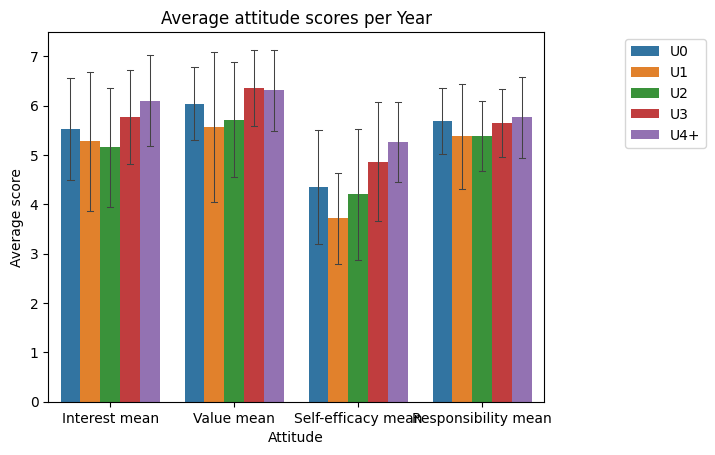

---- Analysis for attitutes and Gender ----
Man: n = 46
Woman: n = 61
Other: n = 0
Prefer not to answer: n = 4


,W,pval,equal_var
Interest mean,3.247855,0.074386,True
Value mean,4.534569,0.035554,False
Self-efficacy mean,0.213336,0.645121,True
Responsibility mean,0.412911,0.521897,True


Normality test for Man group


,,W,pval,normal
Interest mean,,0.933963,0.011723,False
Value mean,,0.814294,0.000004,False
Self-efficacy mean,,0.953533,0.064230,True
Responsibility mean,,0.911858,0.001996,False


Normality test for Woman group


,,W,pval,normal
Interest mean,,0.909913,0.000274,False
Value mean,,0.863850,0.000007,False
Self-efficacy mean,,0.986751,0.751652,True
Responsibility mean,,0.964863,0.077123,True


Parametric ANOVA


,Source,ddof1,ddof2,F,significance,p-unc,np2
Interest mean,Gender,1,105,18.015001,***,0.000047,0.146446
Value mean,Gender,1,105,9.105659,**,0.003198,0.079800
Self-efficacy mean,Gender,1,105,2.611276,ns,0.109107,0.024266
Responsibility mean,Gender,1,105,0.805585,ns,0.371482,0.007614


Non-parametric ANOVA (Welch Test)


,Source,ddof1,ddof2,significance,F,p-unc,np2
Interest mean,Gender,1,74.366825,***,16.183207,0.000137,0.146446
Value mean,Gender,1,67.796672,**,7.922272,0.006386,0.079800
Self-efficacy mean,Gender,1,95.646487,ns,2.591322,0.110746,0.024266
Responsibility mean,Gender,1,81.973079,ns,0.749409,0.389190,0.007614


Post-hoc test for Interest mean


,A,B,mean(A),mean(B),diff,se,T,df,pval,significance,hedges
0,Man,Woman,4.9,5.878689,-0.978689,0.243283,-4.022836,74.366825,0.000137,***,-0.822895


Post-hoc test for Value mean


,A,B,mean(A),mean(B),diff,se,T,df,pval,significance,hedges
0,Man,Woman,5.478261,6.170492,-0.692231,0.245938,-2.814653,67.796672,0.006386,**,-0.585037


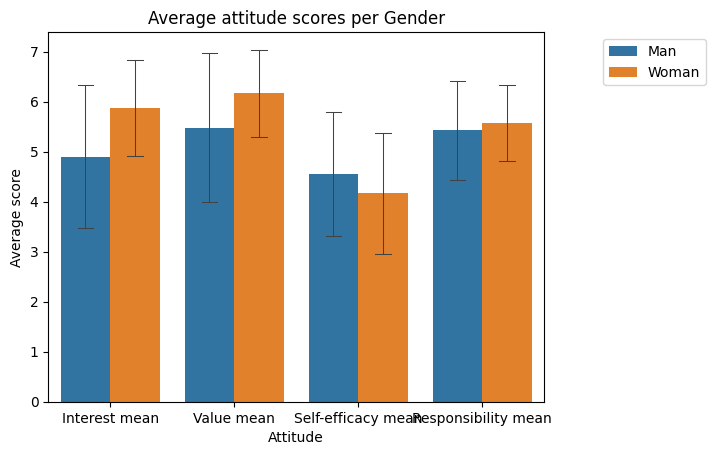

---- Analysis for attitutes and Visible minority ----
Yes: n = 56
No: n = 50
Prefer not to answer: n = 5


,W,pval,equal_var
Interest mean,1.745593,0.189331,True
Value mean,0.203195,0.653093,True
Self-efficacy mean,1.388736,0.241308,True
Responsibility mean,1.204098,0.275038,True


Normality test for Yes group


,,W,pval,normal
Interest mean,,0.939732,7.565413e-03,False
Value mean,,0.771563,6.121691e-08,False
Self-efficacy mean,,0.969720,1.706566e-01,True
Responsibility mean,,0.876877,3.702061e-05,False


Normality test for No group


,,W,pval,normal
Interest mean,,0.875557,0.000082,False
Value mean,,0.839566,0.000008,False
Self-efficacy mean,,0.989201,0.925758,True
Responsibility mean,,0.969997,0.231381,True


Parametric ANOVA


,Source,ddof1,ddof2,F,significance,p-unc,np2
Interest mean,Visible minority,1,104,0.007953,ns,0.929110,0.000076
Value mean,Visible minority,1,104,1.231390,ns,0.269696,0.011702
Self-efficacy mean,Visible minority,1,104,0.697193,ns,0.405643,0.006659
Responsibility mean,Visible minority,1,104,0.066848,ns,0.796494,0.000642


Non-parametric ANOVA (Welch Test)


,Source,ddof1,ddof2,significance,F,p-unc,np2
Interest mean,Visible minority,1,91.386998,ns,0.007719,0.930181,0.000076
Value mean,Visible minority,1,101.776383,ns,1.226692,0.270662,0.011702
Self-efficacy mean,Visible minority,1,103.684802,ns,0.710731,0.401142,0.006659
Responsibility mean,Visible minority,1,102.849391,ns,0.066915,0.796400,0.000642


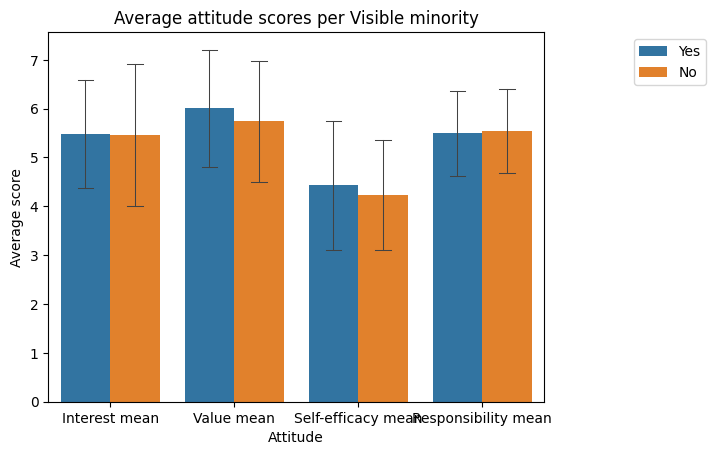

---- Analysis for attitutes and Age ----
<18: n = 0
18-24: n = 108
25-34: n = 2
35-44: n = 0
>45: n = 0
Prefer not to answer: n = 1
---- Analysis for attitutes and Ethics experience ----
Yes: n = 46
No: n = 65


,W,pval,equal_var
Interest mean,0.582493,0.446985,True
Value mean,0.020851,0.885453,True
Self-efficacy mean,0.149482,0.699785,True
Responsibility mean,0.146374,0.702770,True


Normality test for Yes group


,,W,pval,normal
Interest mean,,0.851469,3.356378e-05,False
Value mean,,0.717777,4.435529e-08,False
Self-efficacy mean,,0.985836,8.415819e-01,True
Responsibility mean,,0.967393,2.210746e-01,True


Normality test for No group


,,W,pval,normal
Interest mean,,0.935979,0.002258,False
Value mean,,0.858180,0.000003,False
Self-efficacy mean,,0.967827,0.088557,True
Responsibility mean,,0.927925,0.000980,False


Parametric ANOVA


,Source,ddof1,ddof2,F,significance,p-unc,np2
Interest mean,Ethics experience,1,109,2.580851,ns,0.111057,0.023130
Value mean,Ethics experience,1,109,2.517867,ns,0.115460,0.022578
Self-efficacy mean,Ethics experience,1,109,10.429582,**,0.001639,0.087328
Responsibility mean,Ethics experience,1,109,3.694568,ns,0.057200,0.032784


Non-parametric ANOVA (Welch Test)


,Source,ddof1,ddof2,significance,F,p-unc,np2
Interest mean,Ethics experience,1,86.613240,ns,2.438355,0.122047,0.023130
Value mean,Ethics experience,1,91.517997,ns,2.441797,0.121592,0.022578
Self-efficacy mean,Ethics experience,1,100.999670,**,10.683285,0.001478,0.087328
Responsibility mean,Ethics experience,1,103.753153,ns,3.857682,0.052194,0.032784


Post-hoc test for Self-efficacy mean


,A,B,mean(A),mean(B),diff,se,T,df,pval,significance,hedges
0,No,Yes,4.009231,4.734783,-0.725552,0.221981,-3.268529,100.99967,0.001478,**,-0.617951


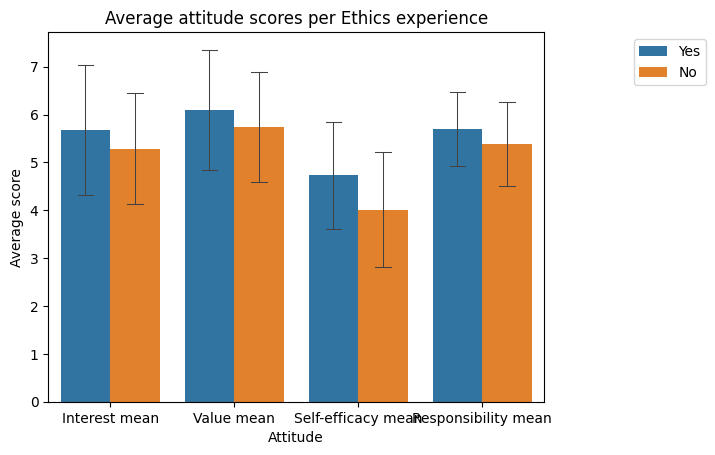

In [61]:
# we skip the field of study and the career choices
for d in demographics:
    if d == "Career" or d == "Field":
        continue
    print(f"---- Analysis for attitutes and {d} ----")

    # get the data for the demographic
    data_year = pd.DataFrame()
    year_groups = {}

    for year in demographics[d]:
        group = data[data[d] == year]
        group = group[[d]+attitudes_mean]

        # print group size
        print(f"{year}: n = {len(group)}")

        if len(group) > 5:
            year_groups[year] = group
            data_year = pd.concat([data_year, group])


    if len(year_groups) >= 2:
        # test equal variance
        equal_var_year = utils.equal_var_test([year_groups[year] for year in year_groups], attitudes_mean)
        display(equal_var_year)

        # test normality
        for year in year_groups:
            norm_test = pg.normality(year_groups[year][attitudes_mean], method="shapiro")
            print(f"Normality test for {year} group")
            display(norm_test)

        # perform ANOVA
        aov_year, welch_year = utils.anova(data_year, d, attitudes_mean)
        print("Parametric ANOVA")
        display(aov_year)
        print("Non-parametric ANOVA (Welch Test)")
        display(welch_year)

        # perform posthoc test
        posthoc_attitudes = utils.anova_post_hoc(data_year, d, attitudes_mean, welch_year, False)
        for p in posthoc_attitudes:
            print(f"Post-hoc test for {p}")
            display(posthoc_attitudes[p])

        # format data for barplot
        data_year_df = data_year.melt(id_vars=[(d, '')], var_name="attitude", value_name="mean")
        data_year_df.rename(columns={(d, ''): d}, inplace=True)

        # plot
        ax = sns.barplot(
        data=data_year_df,
        x="attitude",
        y="mean",
        hue=d ,
        estimator="mean",
        errorbar="sd",
        capsize=0.25,
        errwidth=0.75
        )

        ax.set_title(f"Average attitude scores per {d}")
        ax.set_xlabel("Attitude")
        ax.set_ylabel("Average score")
        ax.legend(loc='upper right', bbox_to_anchor=(1.34, 1))
        
        plt.show()
        # p-values stars
        '''
        annotations = [(("U1", "Self-efficacy mean"), ("U3", "Self-efficacy mean"), 0.001226),
                    (("U1", "Self-efficacy mean"), ("U4+", "Self-efficacy mean"), 0.000163)]
        starbars.draw_annotation(annotations)
        '''



## Career questions
Questions for the career are dealt with differently because they are likert values. Instead of ANOVA, I take a correlation between attitudes and career questions. 

In [62]:
for i in range(1, 4):
    print(f"Q{i}: {questions[f"Career Q{i}"]}")

Q1: I plan to pursue a career in computer science or a closely related field (e.g. software engineering)
Q2: Technical and programming skills will be important in my future career
Q3: It is important for me to have a career in which I can make a positive impact on society


Visualization of the career data

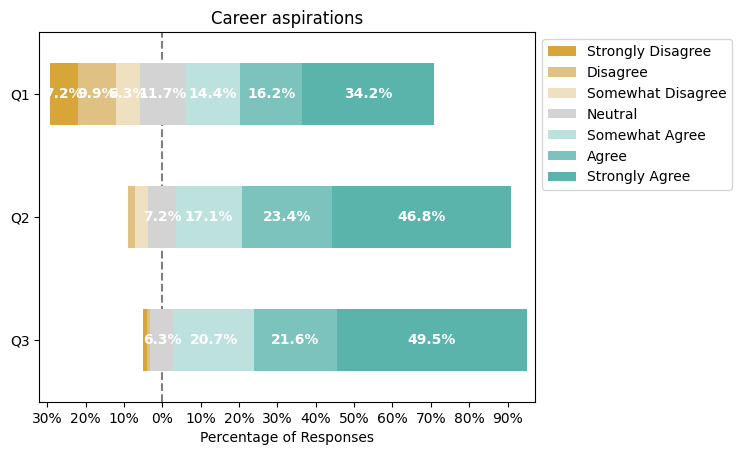

In [63]:
ax = plot_likert.plot_likert(data["Career"], likert, plot_percentage=True, colors=plot_likert.colors.likert7, bar_labels=True, legend=False)
ax.set_title("Career aspirations")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, likert_values, bbox_to_anchor=(1, 1))

Text(0, 0.5, 'Average score')

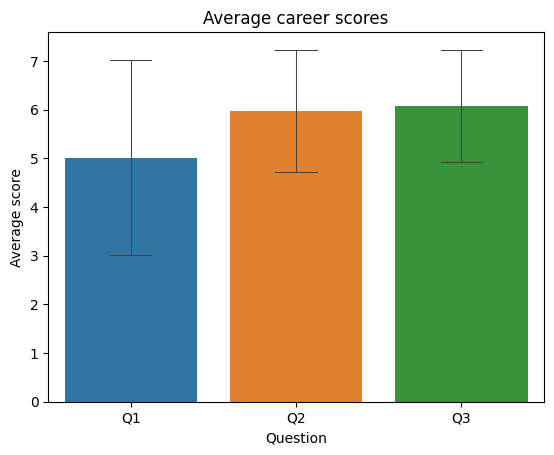

In [64]:
ax = sns.barplot(data=data["Career"], 
            estimator="mean",
            errorbar="sd",
            capsize=0.25,
            errwidth=0.75
)

ax.set_title("Average career scores")
ax.set_xlabel("Question")
ax.set_ylabel("Average score")

In [65]:
data_career = data[["Career", "Interest mean", "Value mean", "Self-efficacy mean", "Responsibility mean"]]
corr_career = pg.rcorr(data_career)
corr_career

Career               Interest mean Value mean  \
                            Q1     Q2     Q3                            
Career              Q1       -    ***                                   
                    Q2   0.581      -      *                            
                    Q3    0.11   0.21      -            **         **   
Interest mean            0.011  0.093  0.278             -        ***   
Value mean              -0.089  0.074  0.284         0.739          -   
Self-efficacy mean       0.118  0.363  0.239         0.267      0.283   
Responsibility mean      -0.04  0.121  0.317         0.319      0.537   

                       Self-efficacy mean Responsibility mean  
                                                               
Career              Q1                                         
                    Q2                ***                      
                    Q3                  *                 ***  
Interest mean                          **                 ***  
Value mean                             **                 ***  
Self-efficacy mean                      -                  **  
Responsibility mean                 0.305                   -

<Axes: xlabel='None-None', ylabel='None-None'>

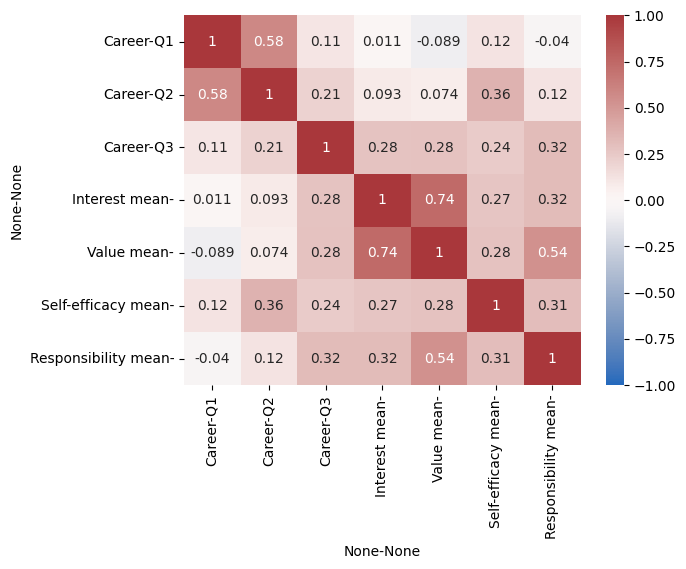

In [66]:
corr_career_pd = data_career.corr()
sns.heatmap(corr_career_pd, annot=True, cmap="vlag", vmin=-1, vmax=1)

## Interaction between attitude and major

Find the sample size of all combinations of possible majors.

In [77]:
data_field = data["Field"]

major_only = data[(data[("Field", "CS/SWE major")]== 1) & (data[("Field", "CS/SWE minor")] == 0) & (data[("Field", "Other")] == 0)]
minor_only = data[(data[("Field", "CS/SWE major")]== 0) & (data[("Field", "CS/SWE minor")] == 1) & (data[("Field", "Other")] == 0)]
other_only = data[(data[("Field", "CS/SWE major")]== 0) & (data[("Field", "CS/SWE minor")] == 0) & (data[("Field", "Other")] == 1)]

major_and_minor = data[(data[("Field", "CS/SWE major")]== 1) & (data[("Field", "CS/SWE minor")] == 1) & (data[("Field", "Other")] == 0)]
major_and_other = data[(data[("Field", "CS/SWE major")]== 1) & (data[("Field", "CS/SWE minor")] == 0) & (data[("Field", "Other")] == 1)]
minor_and_other = data[(data[("Field", "CS/SWE major")]== 0) & (data[("Field", "CS/SWE minor")] == 1) & (data[("Field", "Other")] == 1)]

major_and_minor_and_other = data[(data[("Field", "CS/SWE major")]== 1) & (data[("Field", "CS/SWE minor")] == 1) & (data[("Field", "Other")] == 1)]

print(f"Number of students with CS major only: {len(major_only)}")
print(f"Number of students with CS minor only: {len(minor_only)}")
print(f"Number of students with non-CS major/minor only: {len(other_only)}")
print(f"Number of students with CS major and CS minor: {len(major_and_minor)}")
print(f"Number of students with CS major and non-CS major/minor: {len(major_and_other)}")
print(f"Number of students with CS minor and non-CS major/minor: {len(minor_and_other)}")
print(f"Number of students with CS major, CS minor, and non-CS major/minor: {len(major_and_minor_and_other)}")

Number of students with CS major only: 55
Number of students with CS minor only: 0
Number of students with non-CS major/minor only: 32
Number of students with CS major and CS minor: 0
Number of students with CS major and non-CS major/minor: 11
Number of students with CS minor and non-CS major/minor: 13
Number of students with CS major, CS minor, and non-CS major/minor: 0


Compare people with CS major or minor to people who are just in non-CS majors
1. Comparingh everyone who is doing some form of CS as a major or minor vs those who are not
2. Comparing those who are doing CS major vs those who are not
3. Comparing those who are just doing a CS major (with no other major or minor) vs those who are not

In [ ]:
masks = [(data[("Field", "CS/SWE major")]==1) | (data[("Field", "CS/SWE minor")]==1), # CS maj/min vs other
         (data[("Field", "CS/SWE major")]==1),
         (data[("Field", "CS/SWE major")]== 1) & (data[("Field", "CS/SWE minor")] == 0) & (data[("Field", "Other")] == 0)]                                        # CS maj vs other


titles = ["CS majors/minors vs Other majors",
          "CS majors vs Other majors/CS minors",
          "CS majors only vs Interdisciplinary"]


----- Analysis for CS majors/minors vs Other majors -----
Equal variance test


,W,pval,equal_var
Interest mean,1.271291,0.262001,True
Value mean,0.085673,0.770308,True
Self-efficacy mean,1.083193,0.300287,True
Responsibility mean,0.124504,0.724881,True


Normality test for CS group


,,W,pval,normal
Interest mean,,0.923513,1.541576e-04,False
Value mean,,0.829851,4.187273e-08,False
Self-efficacy mean,,0.980772,2.792967e-01,True
Responsibility mean,,0.928747,2.772010e-04,False


Normality test for Non-CS group


,,W,pval,normal
Interest mean,,0.908022,0.009973,False
Value mean,,0.778027,0.000016,False
Self-efficacy mean,,0.964538,0.363632,True
Responsibility mean,,0.940980,0.079819,True


Parametric ANOVA


,Source,ddof1,ddof2,F,significance,p-unc,np2
Interest mean,group,1,109,1.360803,ns,0.245944,0.012330
Value mean,group,1,109,0.343274,ns,0.559157,0.003139
Self-efficacy mean,group,1,109,2.180877,ns,0.142618,0.019616
Responsibility mean,group,1,109,1.055877,ns,0.306432,0.009594


Non-parametric ANOVA (Welch Test)


,Source,ddof1,ddof2,significance,F,p-unc,np2
Interest mean,group,1,47.471819,ns,1.116263,0.296072,0.012330
Value mean,group,1,49.261510,ns,0.293599,0.590366,0.003139
Self-efficacy mean,group,1,67.822628,ns,2.525125,0.116697,0.019616
Responsibility mean,group,1,63.951986,ns,1.162925,0.284911,0.009594


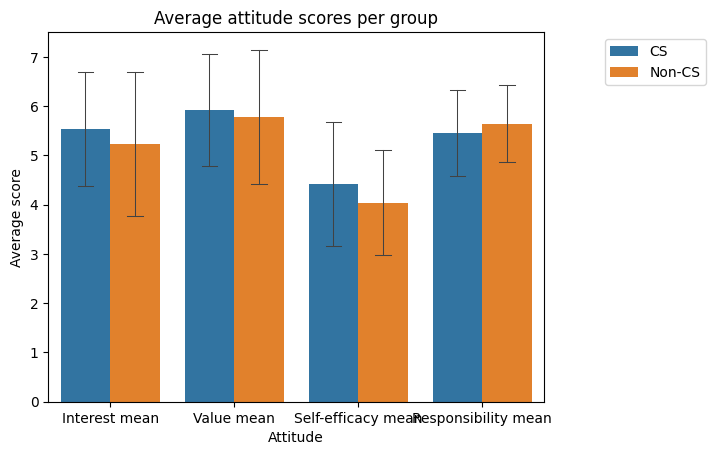

----- Analysis for CS majors vs Other majors/CS minors -----
Equal variance test


,W,pval,equal_var
Interest mean,0.529123,0.468536,True
Value mean,0.067892,0.794923,True
Self-efficacy mean,0.017443,0.895170,True
Responsibility mean,0.111514,0.739068,True


Normality test for CS group


,,W,pval,normal
Interest mean,,0.923774,5.830183e-04,False
Value mean,,0.823722,2.052145e-07,False
Self-efficacy mean,,0.975553,2.170034e-01,True
Responsibility mean,,0.923361,5.594875e-04,False


Normality test for Non-CS group


,,W,pval,normal
Interest mean,,0.910278,0.002011,False
Value mean,,0.790457,0.000001,False
Self-efficacy mean,,0.981931,0.698456,True
Responsibility mean,,0.943877,0.029916,False


Parametric ANOVA


,Source,ddof1,ddof2,F,significance,p-unc,np2
Interest mean,group,1,109,0.500119,ns,0.480957,0.004567
Value mean,group,1,109,0.042883,ns,0.836332,0.000393
Self-efficacy mean,group,1,109,0.955944,ns,0.330376,0.008694
Responsibility mean,group,1,109,0.372631,ns,0.542844,0.003407


Non-parametric ANOVA (Welch Test)


,Source,ddof1,ddof2,significance,F,p-unc,np2
Interest mean,group,1,85.143475,ns,0.472873,0.493537,0.004567
Value mean,group,1,92.304022,ns,0.042281,0.837539,0.000393
Self-efficacy mean,group,1,91.502245,ns,0.938055,0.335332,0.008694
Responsibility mean,group,1,106.751119,ns,0.407964,0.524373,0.003407


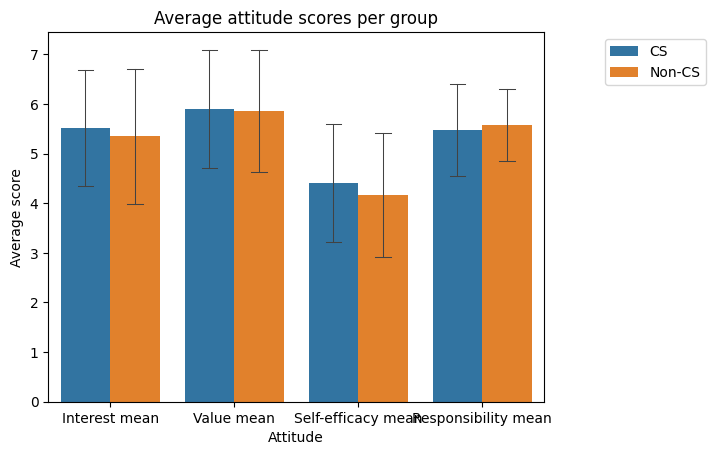

----- Analysis for CS majors only vs Interdisciplinary -----
Equal variance test


,W,pval,equal_var
Interest mean,0.019724,0.888571,True
Value mean,0.143469,0.705593,True
Self-efficacy mean,0.022037,0.882263,True
Responsibility mean,0.012625,0.910744,True


Normality test for CS group


,,W,pval,normal
Interest mean,,0.920840,0.001438,False
Value mean,,0.820809,0.000001,False
Self-efficacy mean,,0.972978,0.249631,True
Responsibility mean,,0.905801,0.000399,False


Normality test for Non-CS group


,,W,pval,normal
Interest mean,,0.908815,4.529376e-04,False
Value mean,,0.796015,2.246686e-07,False
Self-efficacy mean,,0.983406,6.329566e-01,True
Responsibility mean,,0.960335,6.286640e-02,True


Parametric ANOVA


,Source,ddof1,ddof2,F,significance,p-unc,np2
Interest mean,group,1,109,0.028822,ns,0.865506,0.000264
Value mean,group,1,109,0.137736,ns,0.711263,0.001262
Self-efficacy mean,group,1,109,0.211647,ns,0.646396,0.001938
Responsibility mean,group,1,109,0.459609,ns,0.499243,0.004199


Non-parametric ANOVA (Welch Test)


,Source,ddof1,ddof2,significance,F,p-unc,np2
Interest mean,group,1,108.935598,ns,0.028844,0.865455,0.000264
Value mean,group,1,108.833620,ns,0.137683,0.711316,0.001262
Self-efficacy mean,group,1,108.978820,ns,0.211771,0.646300,0.001938
Responsibility mean,group,1,103.677306,ns,0.457867,0.500129,0.004199


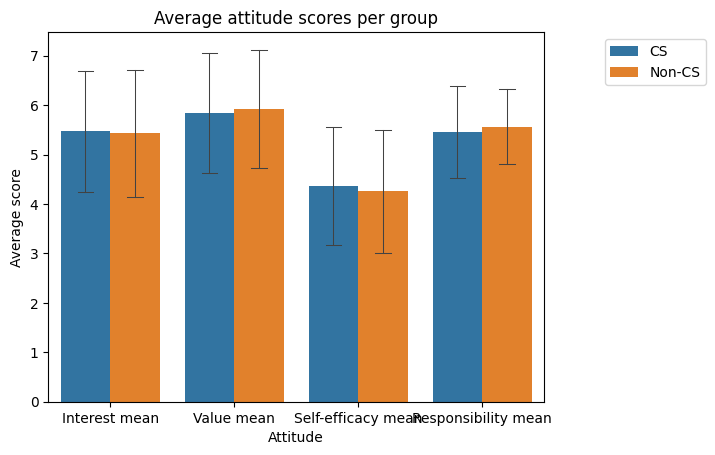

In [121]:
for i, mask in enumerate(masks):
    print(f"----- Analysis for {titles[i]} -----")
    group_data = {"CS": data[mask],
              "Non-CS": data[~mask]}

    # format data to include a group column
    for group in group_data:
        group_data[group]["group"] = group

    # merge the data together with the group
    group_data_all = pd.concat([group_data["CS"][["group"] + attitudes_mean], group_data["Non-CS"][["group"] + attitudes_mean]])

    # test equal variance
    equal_var_year = utils.equal_var_test([group_data[group] for group in group_data], attitudes_mean)
    print("Equal variance test")
    display(equal_var_year)

    # test normality
    for group in group_data:
        norm_test = pg.normality(group_data[group][attitudes_mean], method="shapiro")
        print(f"Normality test for {group} group")
        display(norm_test)

    # perform ANOVA
    aov_year, welch_year = utils.anova(group_data_all, "group", attitudes_mean)
    print("Parametric ANOVA")
    display(aov_year)
    print("Non-parametric ANOVA (Welch Test)")
    display(welch_year)

    # perform posthoc test
    posthoc_attitudes = utils.anova_post_hoc(group_data_all, "group", attitudes_mean, welch_year, False)
    for p in posthoc_attitudes:
        print(f"Post-hoc test for {p}")
        display(posthoc_attitudes[p])

    # format data for barplot
    group_data_all_df = group_data_all.melt(id_vars=[("group", '')], var_name="attitude", value_name="mean")
    group_data_all_df.rename(columns={("group", ''): "group"}, inplace=True)
    group_data_all_df

    # plot
    ax = sns.barplot(
    data=group_data_all_df,
    x="attitude",
    y="mean",
    hue="group" ,
    estimator="mean",
    errorbar="sd",
    capsize=0.25,
    errwidth=0.75
    )

    ax.set_title(f"Average attitude scores per group")
    ax.set_xlabel("Attitude")
    ax.set_ylabel("Average score")
    ax.legend(loc='upper right', bbox_to_anchor=(1.34, 1))

    plt.show()


## Correlation between attitudes and self-assessment questions
This is to check whether their thoughts on how much they increase their attitudes compares to the attitudes. 

Note that this analysis is only valid for the EE group. Also note that it is possible that an increase does not mean a high value because a person can start off with a low attitude and increase from there. Similarly, a person starting high might not think there was any increase. 

In [145]:
data_sa = ee_data_demo[["Self-assessment"]+attitudes_mean]
corr_sa = pg.rcorr(data_sa)
corr_sa

Self-assessment                              \
                                    Q1     Q2     Q3     Q4     Q5   
Self-assessment     Q1               -    ***    ***    ***    ***   
                    Q2           0.765      -    ***    ***    ***   
                    Q3           0.647  0.687      -    ***    ***   
                    Q4           0.762  0.883  0.735      -    ***   
                    Q5           0.804  0.764  0.801  0.794      -   
Interest mean                    0.487  0.441  0.359  0.353  0.454   
Value mean                       0.348  0.391  0.326  0.327   0.36   
Self-efficacy mean               0.227  0.228  0.392   0.27  0.416   
Responsibility mean              0.389  0.545  0.515  0.507  0.406   

                       Interest mean Value mean Self-efficacy mean  \
                                                                     
Self-assessment     Q1           ***          *                      
                    Q2            **         **                      
                    Q3            **          *                 **   
                    Q4             *          *                      
                    Q5           ***         **                 **   
Interest mean                      -        ***                  *   
Value mean                     0.791          -                  *   
Self-efficacy mean             0.338      0.277                  -   
Responsibility mean            0.305      0.419              0.432   

                       Responsibility mean  
                                            
Self-assessment     Q1                  **  
                    Q2                 ***  
                    Q3                 ***  
                    Q4                 ***  
                    Q5                  **  
Interest mean                            *  
Value mean                              **  
Self-efficacy mean                      **  
Responsibility mean                      -

<Axes: xlabel='None-None', ylabel='None-None'>

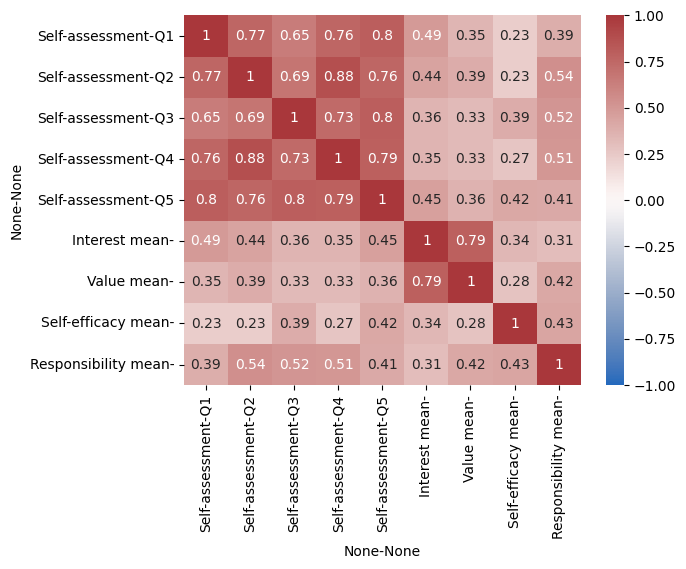

In [146]:
corr_sa_pd = data_sa.corr()
sns.heatmap(corr_sa_pd, annot=True, cmap="vlag", vmin=-1, vmax=1)